In [ ]:
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"
# device

In [ ]:
# tensor = torch.arange(0,10)
# tensor_gpu = tensor.to(device)
# tensor_gpu

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step). unsqueeze(1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="r", s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="predictions")
  plt.legend(prop={"size": 14})


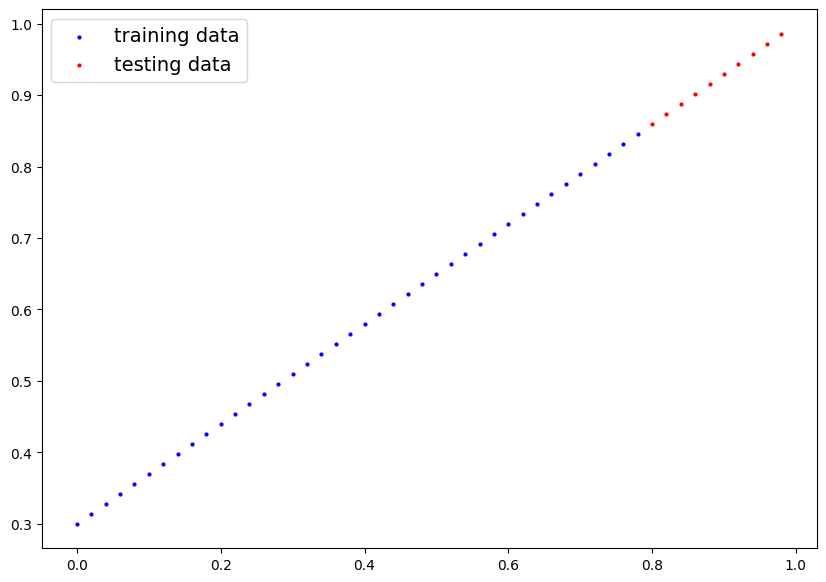

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()
print(list(model.parameters()))
print(model.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

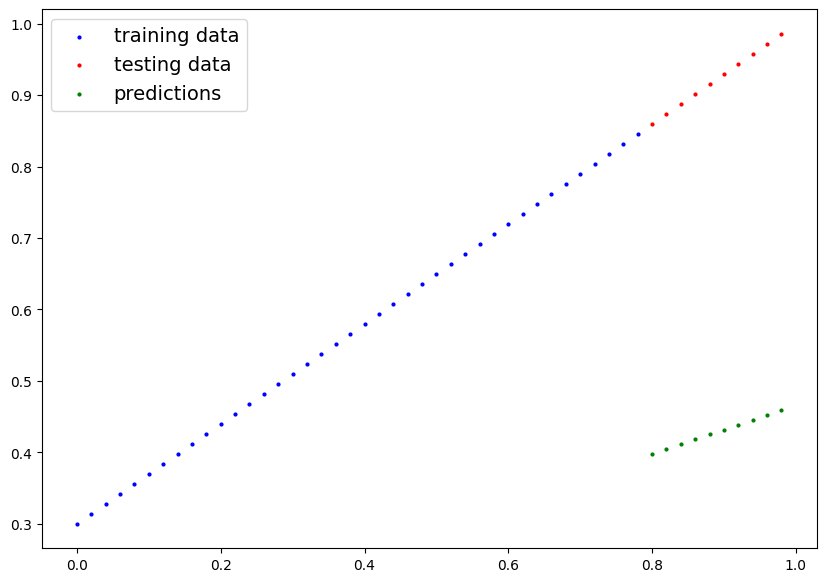

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01)


In [ ]:
torch.manual_seed(42)

epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)
  loss_values.append(loss)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    epoch_count.append(epoch)
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test)
    test_loss_values.append(test_loss)
  if epoch % 10 == 0 :
    print(f"Epoch: {epoch} Loss: {loss} Test loss: {test_loss}")
    print(model.state_dict())


Epoch: 0 Loss: 0.31288138031959534 Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 Loss: 0.1976713240146637 Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 Loss: 0.08908725529909134 Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 Loss: 0.053148526698350906 Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 Loss: 0.04543796554207802 Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 Loss: 0.04167863354086876 Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 Loss: 0.03818932920694351 Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 70 Loss: 0.0347

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
with torch.inference_mode():
  y_pred_new = model(X_test)

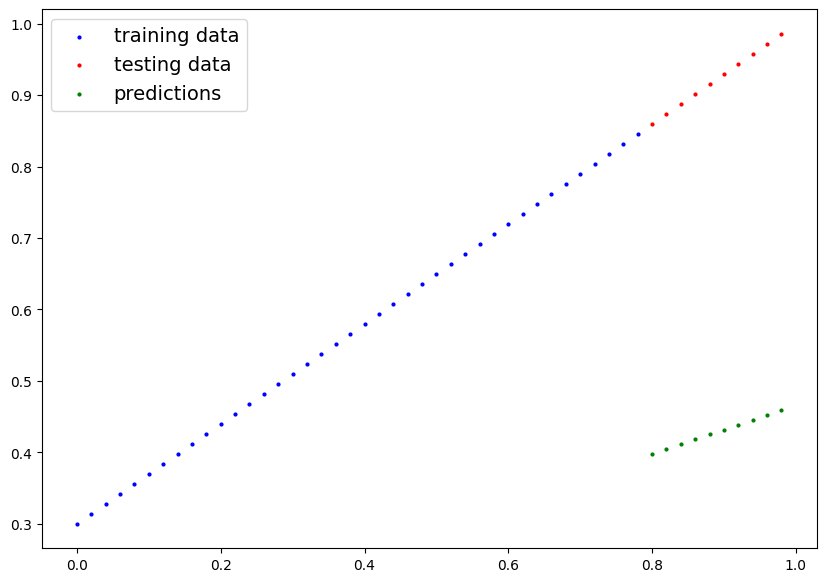

In [ ]:
plot_predictions(predictions=y_preds)

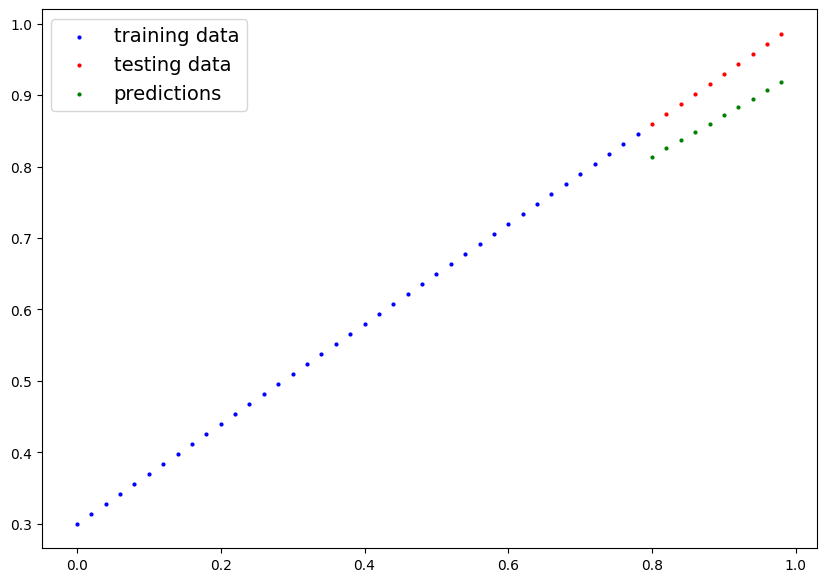

In [ ]:
plot_predictions(predictions=y_pred_new)

Text(0.5, 0, 'epochs')

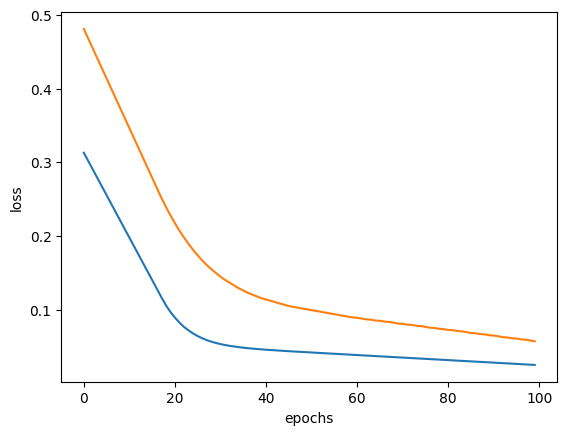

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()))
plt.plot(epoch_count, test_loss_values)
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)



models/01_pytorch_model.pth


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [5]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train)

80

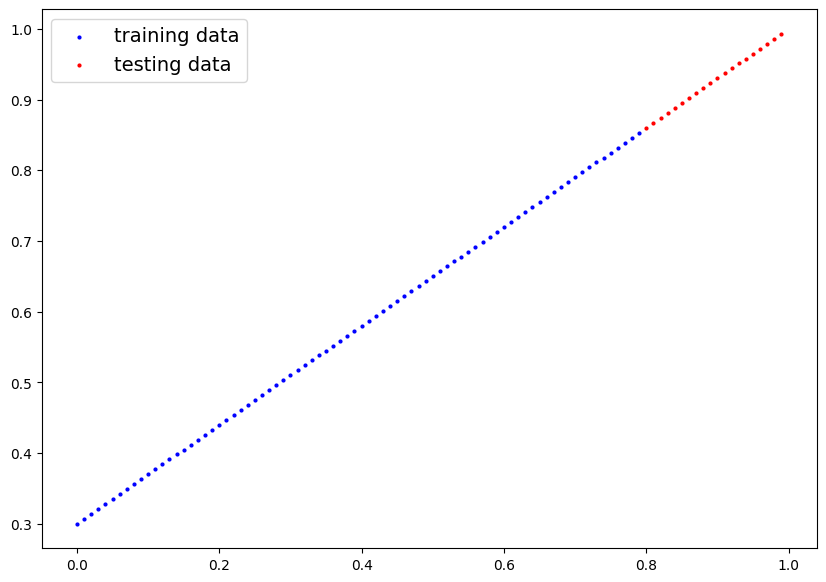

In [8]:
plot_predictions(X_train, y_train, X_test, y_test)

In [52]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1,
                                   out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



In [53]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [54]:
next(model_1.parameters()).device

device(type='cpu')

In [55]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [56]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [57]:
torch.manual_seed(42)


In [58]:
epochs = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"epoch: {epoch} loss: {loss} test loss: {test_loss}")


epoch: 0 loss: 0.5555006265640259 test loss: 0.574234664440155
epoch: 10 loss: 0.43989822268486023 test loss: 0.4388822615146637
epoch: 20 loss: 0.3242958188056946 test loss: 0.30352985858917236
epoch: 30 loss: 0.20869341492652893 test loss: 0.16817744076251984
epoch: 40 loss: 0.09309101104736328 test loss: 0.0328250378370285
epoch: 50 loss: 0.024206461384892464 test loss: 0.04891898110508919
epoch: 60 loss: 0.020295290276408195 test loss: 0.046142738312482834
epoch: 70 loss: 0.01686827838420868 test loss: 0.03849514573812485
epoch: 80 loss: 0.013441259041428566 test loss: 0.03084755875170231
epoch: 90 loss: 0.010015216656029224 test loss: 0.022855961695313454
epoch: 100 loss: 0.006589987780898809 test loss: 0.014520359225571156
epoch: 110 loss: 0.003164683235809207 test loss: 0.006877091713249683
epoch: 120 loss: 0.00668717036023736 test loss: 0.00915310438722372
epoch: 130 loss: 0.00668717036023736 test loss: 0.00915310438722372
epoch: 140 loss: 0.00668717036023736 test loss: 0.00915

In [59]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6954]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3085], device='cuda:0'))])

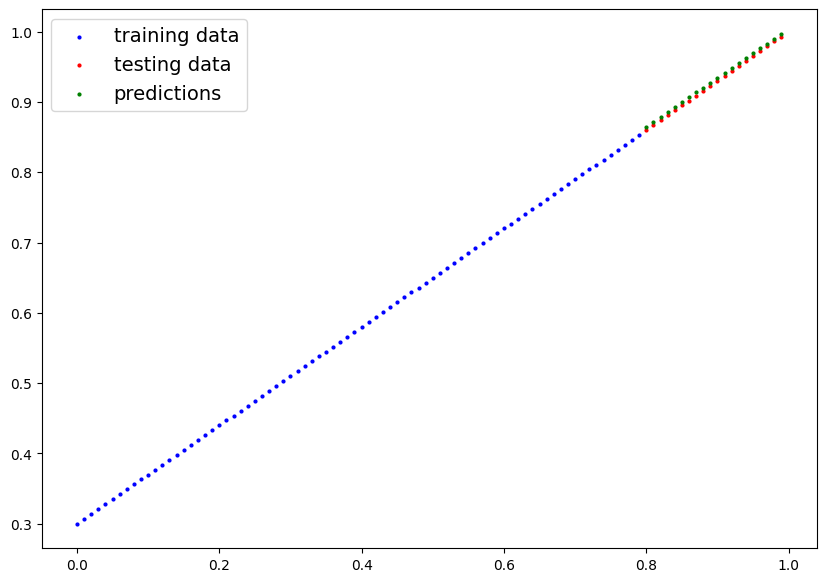

In [60]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions = y_preds.cpu())

In [61]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

models/02_pytorch_model.pth


In [64]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [65]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [67]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6954]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3085], device='cuda:0'))])

In [68]:
loaded_model_1.eval()
with torch.inference_mode():
  y_new_preds = loaded_model_1(X_test)

y_preds == y_new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')